In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [60]:
cpus = [4, 4, 8, 8, 16, 16]
chunk_sizes = [20000, 200000, 20000, 200000, 20000, 200000]
time_sequential = [1677.31, 1748.22, 1677.31, 1748.22, 1677.31, 1748.22]
time_parallel = [465.85, 478.54, 229.96, 240.82, 139.17, 155.70]
speedup = np.array(time_sequential) / np.array(time_parallel)
df = pd.DataFrame({
    'CPUs': cpus,
    'Chunk Size': chunk_sizes,
    'Sequential Time': time_sequential,
    'Parallel Time': time_parallel,
    'Speedup': speedup
})

In [61]:
df

,CPUs,Chunk Size,Sequential Time,Parallel Time,Speedup
0,4,20000,1677.31,465.85,3.600537
1,4,200000,1748.22,478.54,3.653237
2,8,20000,1677.31,229.96,7.293921
3,8,200000,1748.22,240.82,7.259447
4,16,20000,1677.31,139.17,12.052238
5,16,200000,1748.22,155.70,11.228131


# Visual analysis

In [62]:
df_4cpus = df[df['CPUs'] == 4]
df_8cpus = df[df['CPUs'] == 8]
df_16cpus = df[df['CPUs'] == 16]

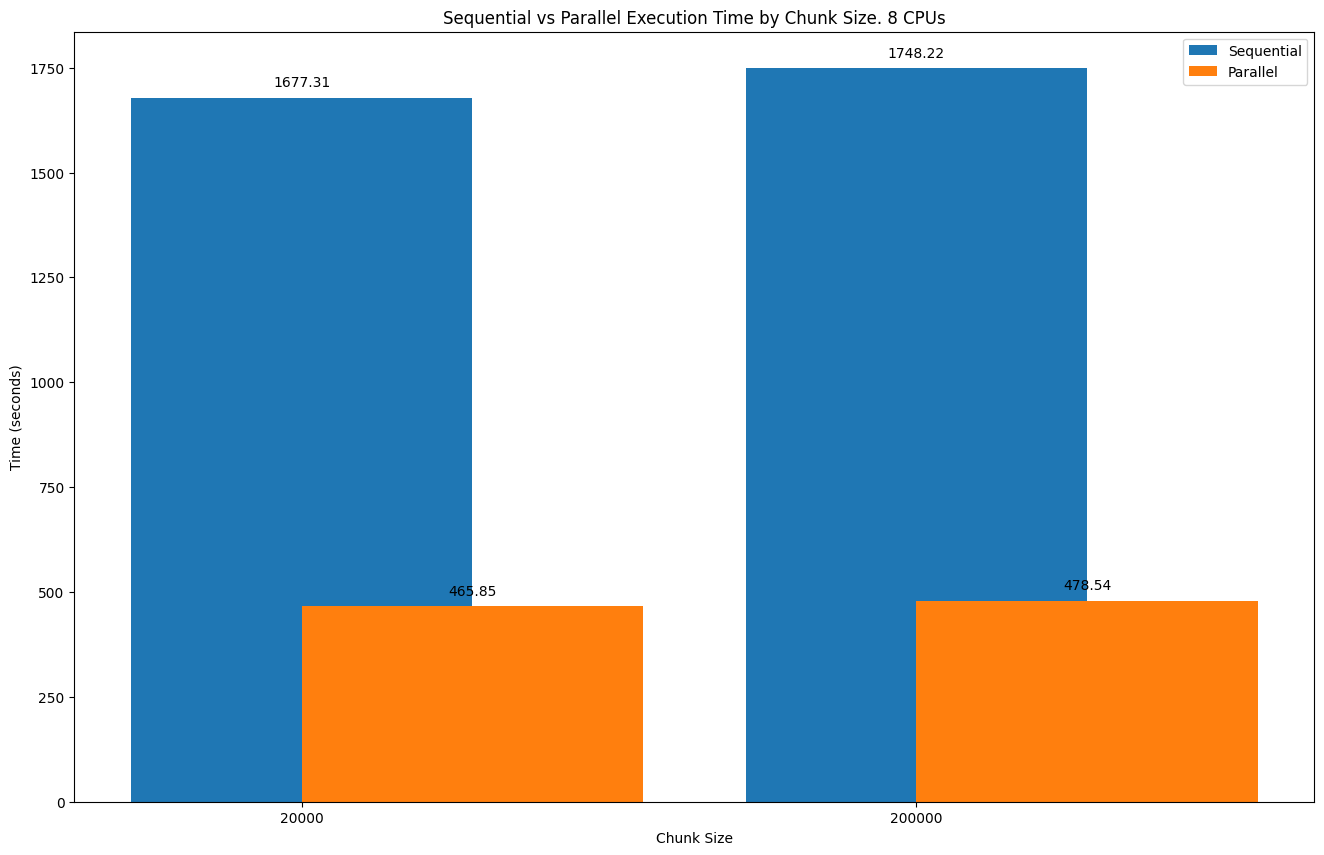

In [63]:
fig, axes = plt.subplots(figsize=(16, 10))

# Plot for 4 CPUs
bars_sequential = plt.bar(df_4cpus['Chunk Size'], df_4cpus['Sequential Time'], width=100000,label='Sequential', align='center')
bars_parallel = plt.bar(df_4cpus['Chunk Size'], df_4cpus['Parallel Time'], width=100000, label='Parallel', align='edge')

for bar in bars_sequential:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 20, round(yval, 2), ha='center', va='bottom', fontsize=10)

for bar in bars_parallel:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 20, round(yval, 2), ha='center', va='bottom', fontsize=10)
axes.set_xticks(df_4cpus['Chunk Size'])
axes.set_xticklabels(df_4cpus['Chunk Size'])
plt.xlabel('Chunk Size')
plt.ylabel('Time (seconds)')
plt.title('Sequential vs Parallel Execution Time by Chunk Size. 8 CPUs')
plt.legend()

plt.show()

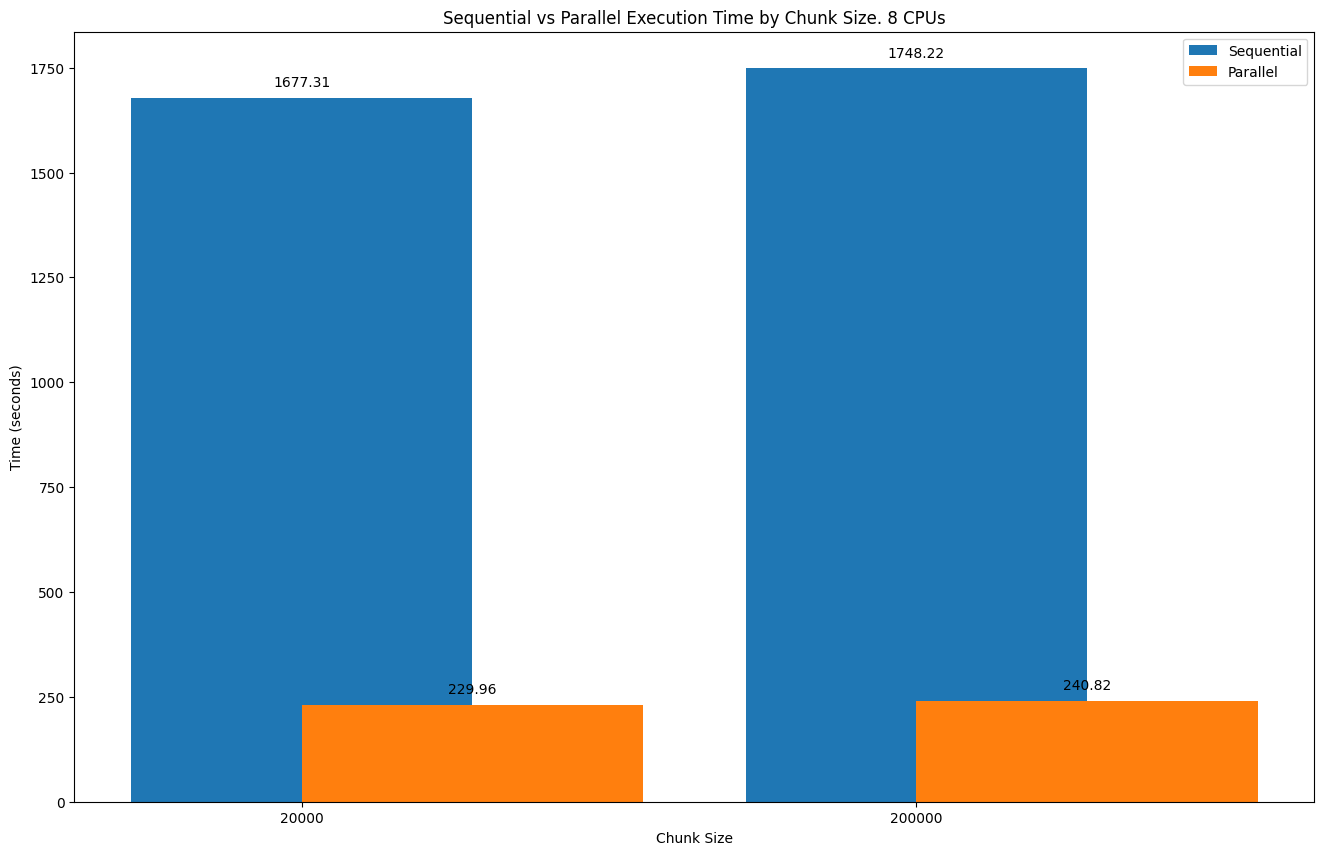

In [64]:
fig, axes = plt.subplots(figsize=(16, 10))

# Plot for 8 CPUs
bars_sequential = plt.bar(df_8cpus['Chunk Size'], df_8cpus['Sequential Time'], width=100000,label='Sequential', align='center')
bars_parallel = plt.bar(df_8cpus['Chunk Size'], df_8cpus['Parallel Time'], width=100000, label='Parallel', align='edge')

for bar in bars_sequential:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 20, round(yval, 2), ha='center', va='bottom', fontsize=10)

for bar in bars_parallel:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 20, round(yval, 2), ha='center', va='bottom', fontsize=10)
axes.set_xticks(df_8cpus['Chunk Size'])
axes.set_xticklabels(df_8cpus['Chunk Size'])
plt.xlabel('Chunk Size')
plt.ylabel('Time (seconds)')
plt.title('Sequential vs Parallel Execution Time by Chunk Size. 8 CPUs')
plt.legend()

plt.show()

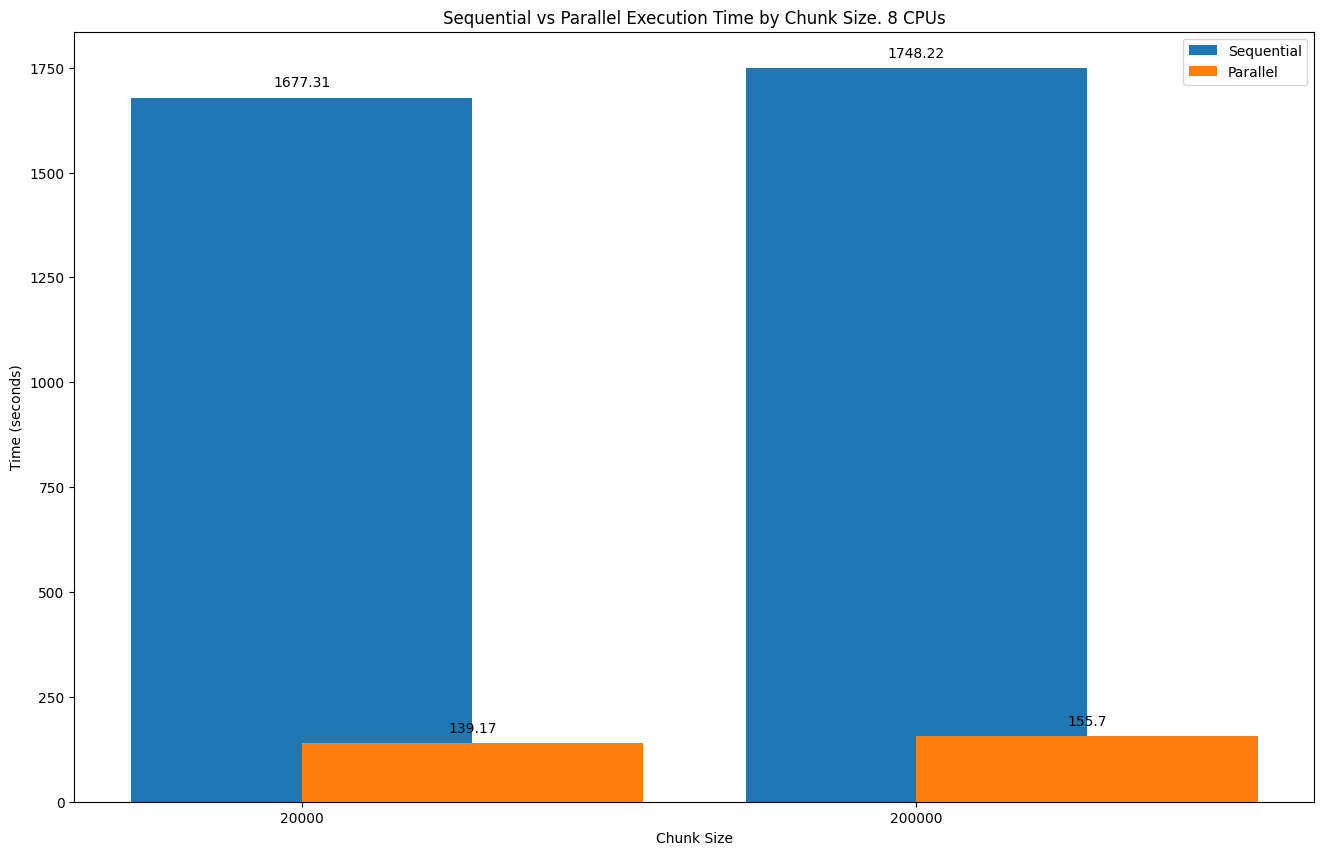

In [65]:
fig, axes = plt.subplots(figsize=(16, 10))

# Plot for 16 CPUs
bars_sequential = plt.bar(df_16cpus['Chunk Size'], df_16cpus['Sequential Time'], width=100000,label='Sequential', align='center')
bars_parallel = plt.bar(df_16cpus['Chunk Size'], df_16cpus['Parallel Time'], width=100000, label='Parallel', align='edge')

for bar in bars_sequential:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 20, round(yval, 2), ha='center', va='bottom', fontsize=10)

for bar in bars_parallel:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 20, round(yval, 2), ha='center', va='bottom', fontsize=10)
axes.set_xticks(df_16cpus['Chunk Size'])
axes.set_xticklabels(df_16cpus['Chunk Size'])
plt.xlabel('Chunk Size')
plt.ylabel('Time (seconds)')
plt.title('Sequential vs Parallel Execution Time by Chunk Size. 8 CPUs')
plt.legend()

plt.show()

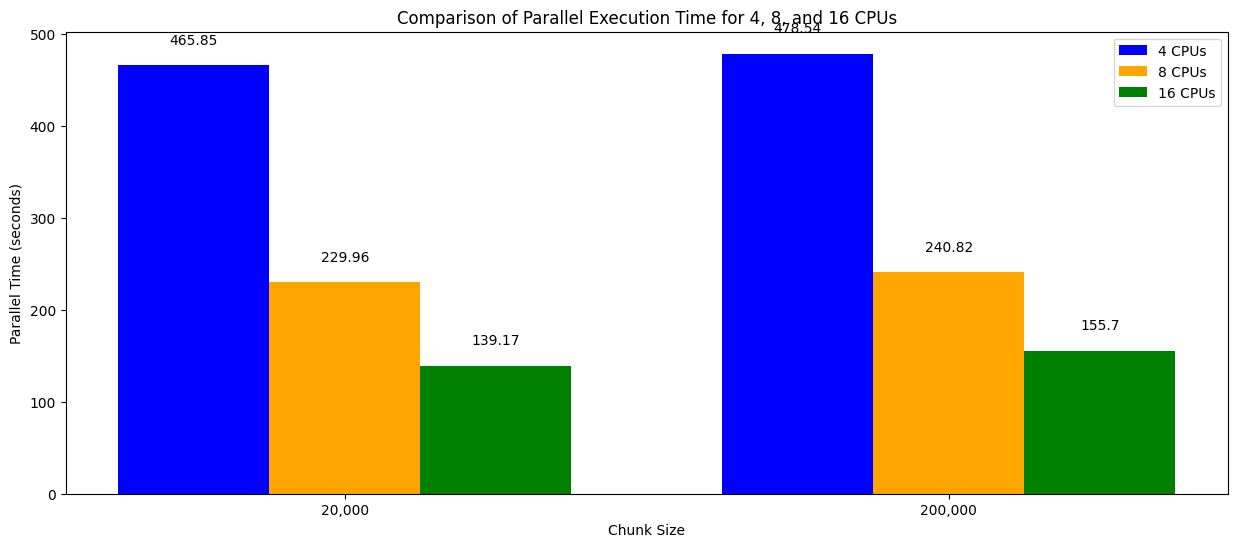

In [66]:
fig, ax = plt.subplots(figsize=(15, 6))

chunk_sizes = df['Chunk Size'].unique()

bar_width = 0.25
x_positions = np.arange(len(chunk_sizes))

parallel_4cpus = df[df['CPUs'] == 4]['Parallel Time']
parallel_8cpus = df[df['CPUs'] == 8]['Parallel Time']
parallel_16cpus = df[df['CPUs'] == 16]['Parallel Time']

bars_4cpus = ax.bar(x_positions - bar_width, parallel_4cpus, bar_width, label='4 CPUs', color='blue')
bars_8cpus = ax.bar(x_positions, parallel_8cpus, bar_width, label='8 CPUs', color='orange')
bars_16cpus = ax.bar(x_positions + bar_width, parallel_16cpus, bar_width, label='16 CPUs', color='green')

for bar in bars_4cpus:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 20, round(yval, 2), ha='center', va='bottom', fontsize=10)

for bar in bars_8cpus:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 20, round(yval, 2), ha='center', va='bottom', fontsize=10)

for bar in bars_16cpus:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 20, round(yval, 2), ha='center', va='bottom', fontsize=10)

ax.set_xticks(x_positions)
ax.set_xticklabels([f'{cs:,}' for cs in chunk_sizes])
ax.set_xlabel('Chunk Size')
ax.set_ylabel('Parallel Time (seconds)')
ax.set_title('Comparison of Parallel Execution Time for 4, 8, and 16 CPUs')

ax.legend()

plt.show()

# Speedup analysis

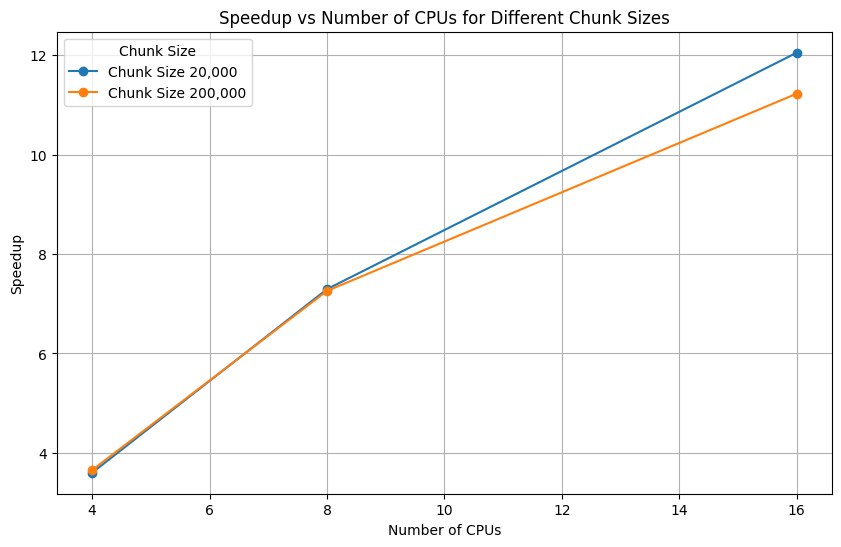

In [70]:
fig, ax = plt.subplots(figsize=(10, 6))

for chunk_size in df['Chunk Size'].unique():
    subset = df[df['Chunk Size'] == chunk_size]
    ax.plot(subset['CPUs'], subset['Speedup'], marker='o', label=f"Chunk Size {chunk_size:,}")

ax.set_xlabel("Number of CPUs")
ax.set_ylabel("Speedup")
ax.set_title("Speedup vs Number of CPUs for Different Chunk Sizes")
ax.legend(title="Chunk Size")
ax.grid(True)

plt.show()

# HPC vs Personal computer

In [78]:
cpus = [4, 4, 8, 8]
chunk_sizes = [20000, 200000, 20000, 200000]
time_sequential = [1677.31, 1748.22, 1677.31, 1748.22]
time_parallel_personal = [725.42, 828.27, 620.48, 649.47]
time_parallel_hpc = [465.85, 478.54, 229.96, 240.82]

speedup_personal = np.array(time_sequential) / np.array(time_parallel_personal)
speedup_hpc = np.array(time_sequential) / np.array(time_parallel_hpc)
speedup_personal_vs_hpc = np.array(time_parallel_personal) / np.array(time_parallel_hpc)

In [79]:
df = pd.DataFrame({
    'CPUs': cpus,
    'Chunk Size': chunk_sizes,
    'Sequential Time': time_sequential,
    'Parallel Time Personal': time_parallel_personal,
    'Parallel Time HPC': time_parallel_hpc,
    'Speedup Personal': speedup_personal,
    'Speedup HPC': speedup_hpc,
    'Speedup Personal VS HPC': speedup_personal_vs_hpc
})

In [80]:
df

,CPUs,Chunk Size,Sequential Time,Parallel Time Personal,Parallel Time HPC,Speedup Personal,Speedup HPC,Speedup Personal VS HPC
0,4,20000,1677.31,725.42,465.85,2.312192,3.600537,1.557197
1,4,200000,1748.22,828.27,478.54,2.110689,3.653237,1.730827
2,8,20000,1677.31,620.48,229.96,2.703246,7.293921,2.698208
3,8,200000,1748.22,649.47,240.82,2.691764,7.259447,2.696911


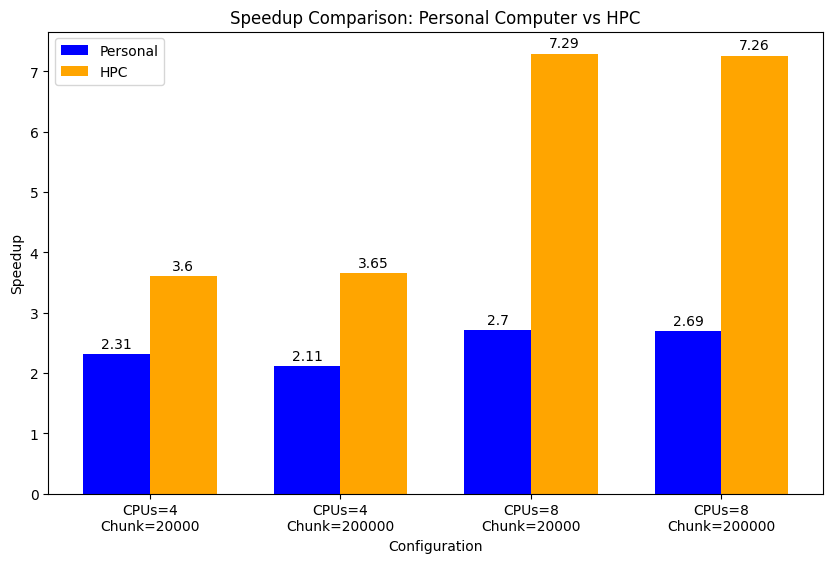

In [83]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
x_positions = np.arange(len(df))

bars_personal = ax.bar(x_positions - bar_width / 2, df['Speedup Personal'], bar_width, label='Personal', color='blue')
bars_hpc = ax.bar(x_positions + bar_width / 2, df['Speedup HPC'], bar_width, label='HPC', color='orange')

ax.set_xlabel('Configuration')
ax.set_ylabel('Speedup')
ax.set_title('Speedup Comparison: Personal Computer vs HPC')
ax.set_xticks(x_positions)
ax.set_xticklabels([f'CPUs={c}\nChunk={cs}' for c, cs in zip(df['CPUs'], df['Chunk Size'])])
ax.legend()

for bar in bars_personal:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=10)

for bar in bars_hpc:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.show()

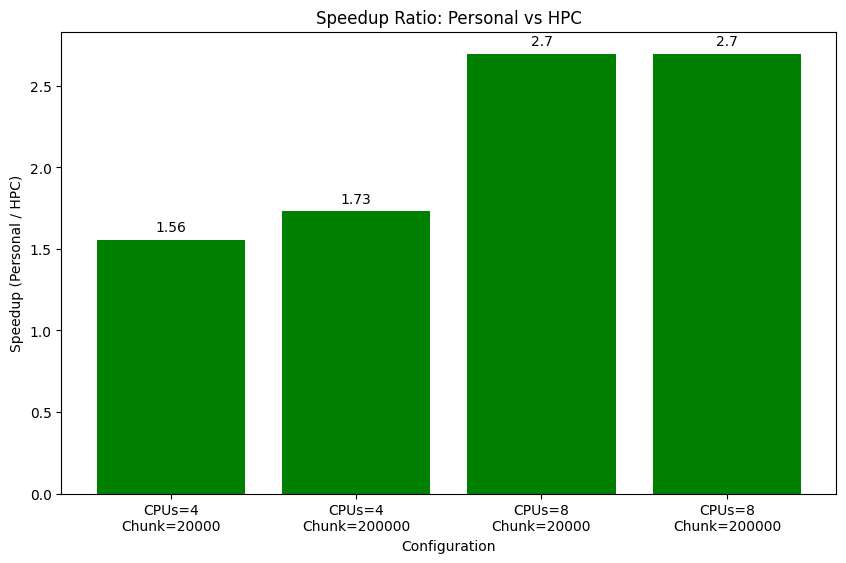

In [84]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x_positions, df['Speedup Personal VS HPC'], color='green')

ax.set_xlabel('Configuration')
ax.set_ylabel('Speedup (Personal / HPC)')
ax.set_title('Speedup Ratio: Personal vs HPC')
ax.set_xticks(x_positions)
ax.set_xticklabels([f'CPUs={c}\nChunk={cs}' for c, cs in zip(df['CPUs'], df['Chunk Size'])])

for i, v in enumerate(df['Speedup Personal VS HPC']):
    ax.text(i, v + 0.05, round(v, 2), ha='center', fontsize=10)

plt.show()